#### Q6 => Please checkout the Dataset and create a ML model for the given Dataset.
   - Please Explain the algorithm you are using.
   - Do Data Analysis, Preprocessing, Visualization etc
   - Build a model and evaluate the model .
   - check metrics MAE, RMSE, Accuracy, R2 Score.
   - Dataset - cruise_ship_info

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("cruise_ship_info.csv")
df

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [3]:
df.index

RangeIndex(start=0, stop=158, step=1)

In [4]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [5]:
df.shape

(158, 9)

In [6]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [8]:
df.isna().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

In [9]:
df.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155509
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1.000000


In [10]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [11]:
df.dtypes

Ship_name             object
Cruise_line           object
Age                    int64
Tonnage              float64
passengers           float64
length               float64
cabins               float64
passenger_density    float64
crew                 float64
dtype: object

In [14]:
df.nunique()

Ship_name            138
Cruise_line           20
Age                   31
Tonnage               94
passengers           104
length                80
cabins                98
passenger_density    109
crew                  91
dtype: int64

In [15]:
df = df.drop(columns=["Ship_name"])

In [16]:
df

,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...
153,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [17]:
df.nunique()

Cruise_line           20
Age                   31
Tonnage               94
passengers           104
length                80
cabins                98
passenger_density    109
crew                  91
dtype: int64

In [19]:
df["Cruise_line"].value_counts().sort_values(ascending=False)

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
P&O                   6
Star                  6
Regent_Seven_Seas     5
Silversea             4
Windstar              3
Cunard                3
Seabourn              3
Oceania               3
Disney                2
Azamara               2
Crystal               2
Orient                1
Name: Cruise_line, dtype: int64

In [25]:
df.groupby("Cruise_line")["crew"].describe()

,count,mean,std,min,25%,50%,75%,max
Cruise_line,,,,,,,,
Azamara,2.0,3.550000,0.000000e+00,3.55,3.5500,3.550,3.5500,3.55
Carnival,22.0,10.135909,2.423179e+00,6.60,9.2000,9.300,11.2000,19.10
Celebrity,10.0,8.072000,2.918165e+00,0.60,7.1700,9.090,9.9900,9.99
Costa,11.0,7.700000,2.608475e+00,3.85,6.0850,7.660,9.9400,10.90
Crystal,2.0,5.905000,6.434672e-01,5.45,5.6775,5.905,6.1325,6.36
Cunard,3.0,10.246667,1.980210e+00,9.00,9.1050,9.210,10.8700,12.53
Disney,2.0,9.450000,0.000000e+00,9.45,9.4500,9.450,9.4500,9.45
Holland_American,14.0,6.215000,1.134208e+00,4.60,5.5800,5.880,6.3600,8.42
MSC,8.0,7.540000,2.999152e+00,2.97,6.5875,7.200,8.1675,13.13


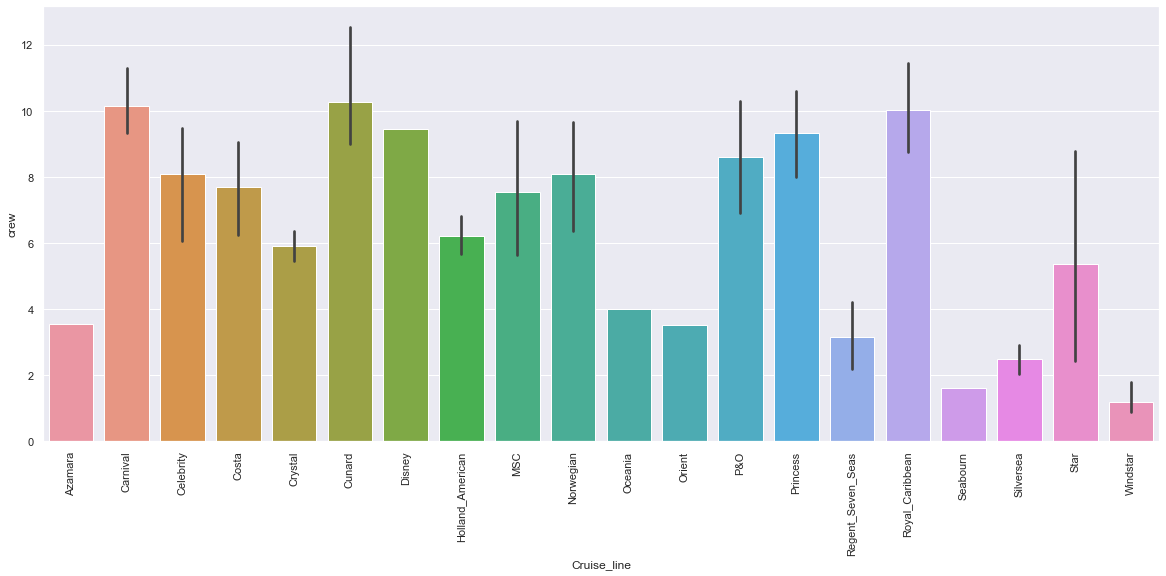

In [35]:
sns.set(rc={'figure.figsize':(20, 8)})

fig = sns.barplot(x=df["Cruise_line"], y=df["crew"], data=df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

plt.show()

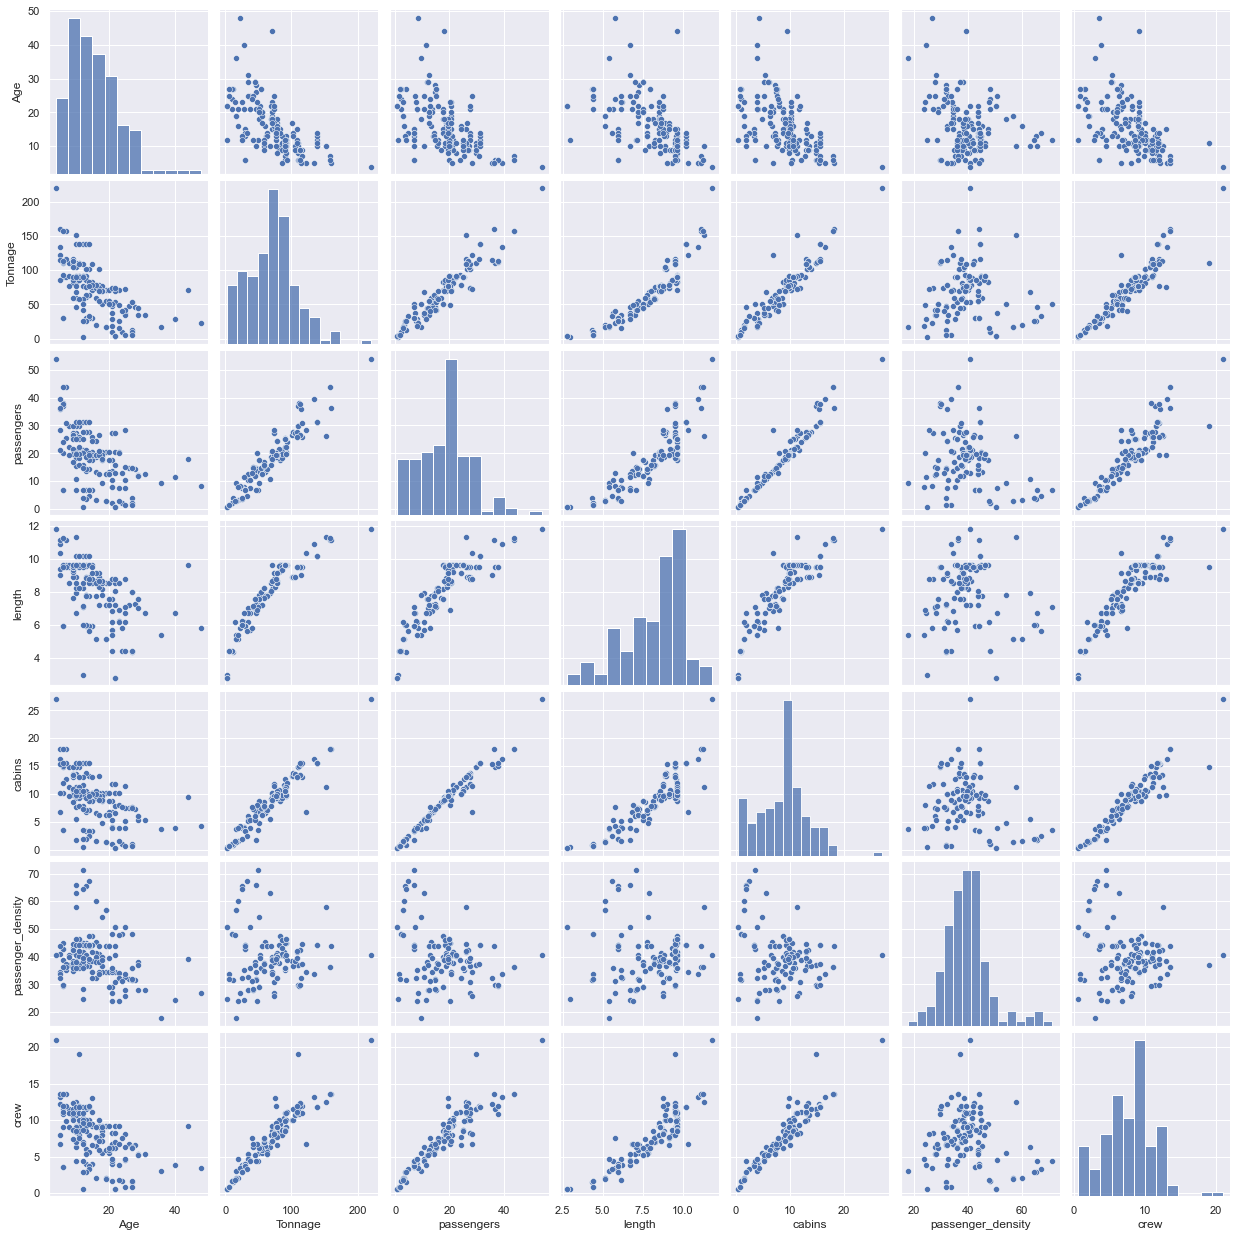

In [36]:
sns.pairplot(df)

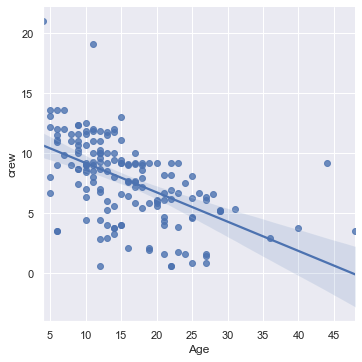

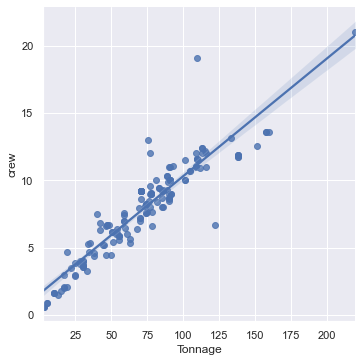

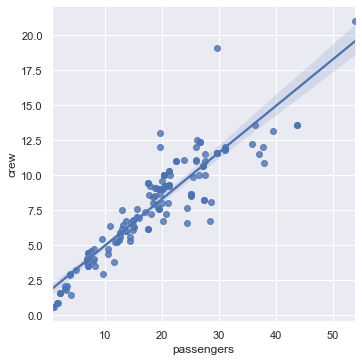

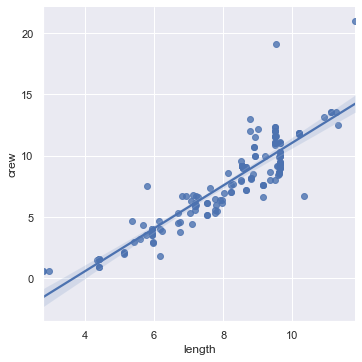

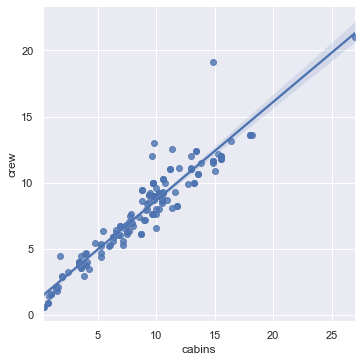

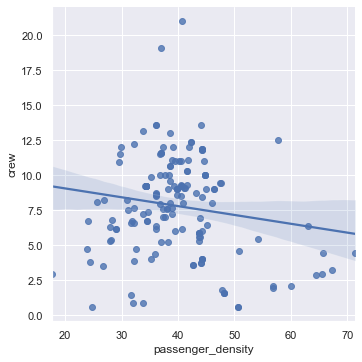

In [39]:
for i in df.columns[1:-1]:
    sns.lmplot(x=i, y="crew", data=df)

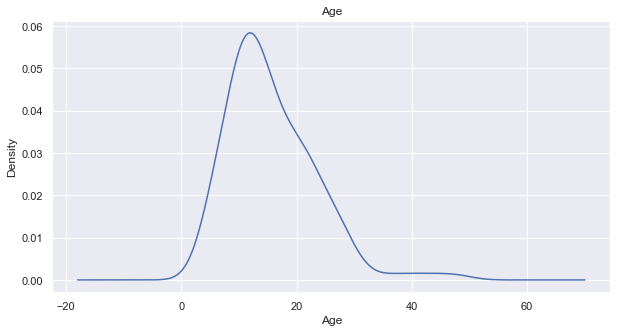

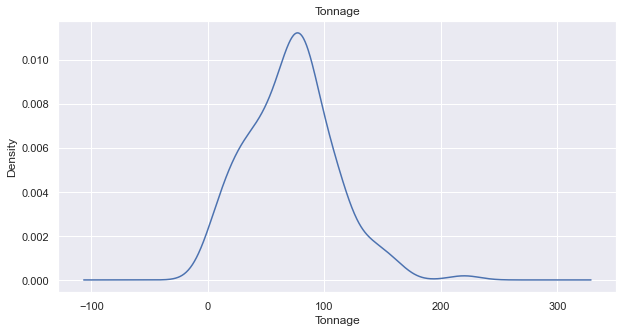

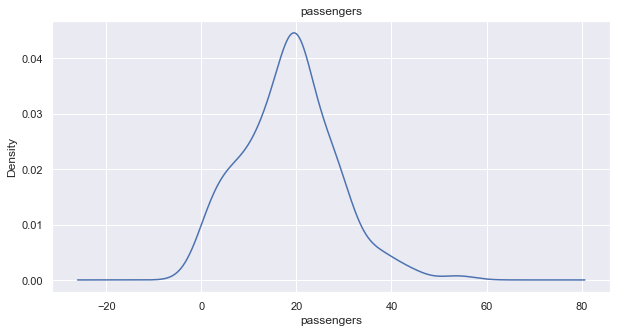

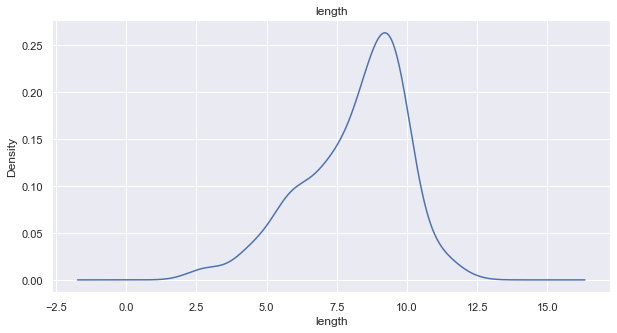

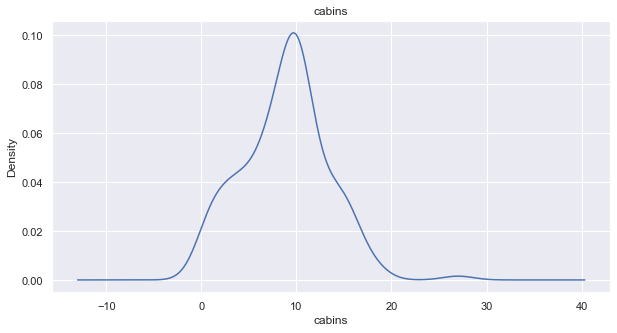

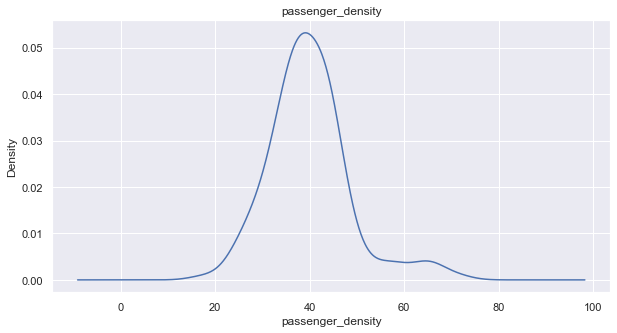

In [49]:
sns.set(rc={'figure.figsize':(10, 5)})

for i in df.columns[1:-1]:
    df[i].plot.kde()
    plt.xlabel(i)
    plt.ylabel("Density")
    plt.title(i)
    plt.show()

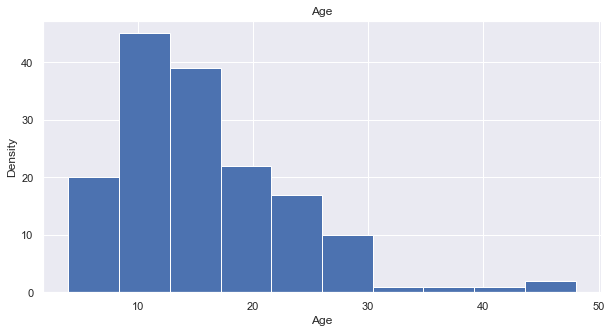

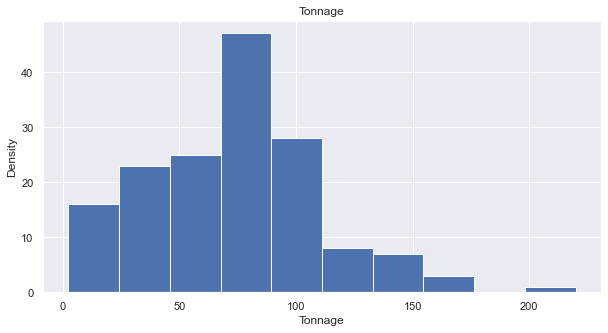

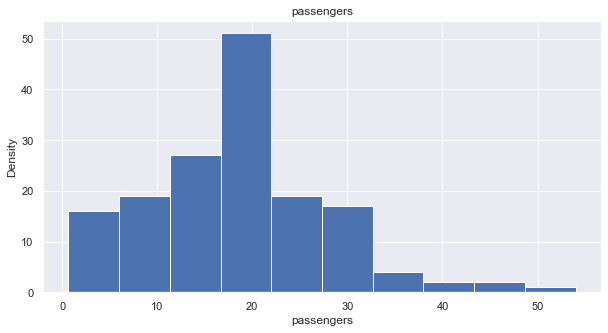

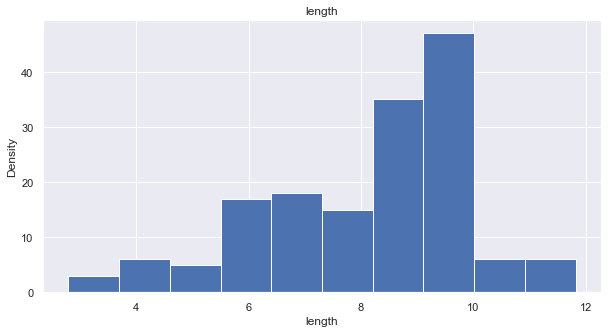

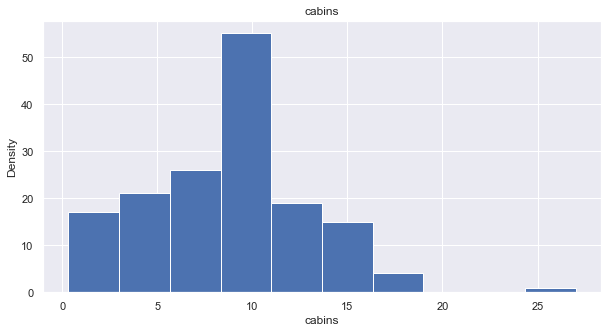

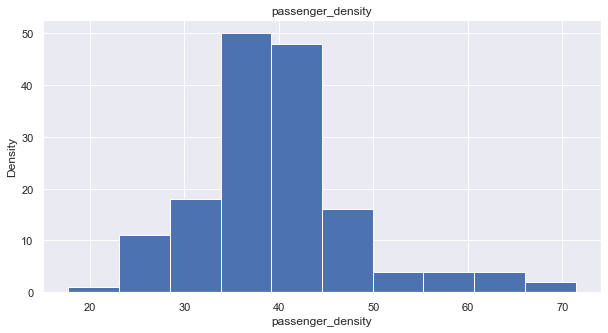

In [50]:
sns.set(rc={'figure.figsize':(10, 5)})

for i in df.columns[1:-1]:
    df[i].plot.hist()
    plt.xlabel(i)
    plt.ylabel("Density")
    plt.title(i)
    plt.show()

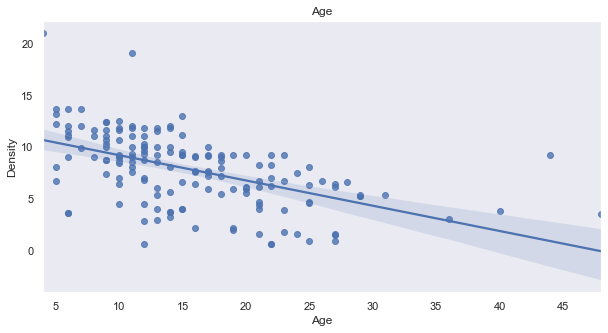

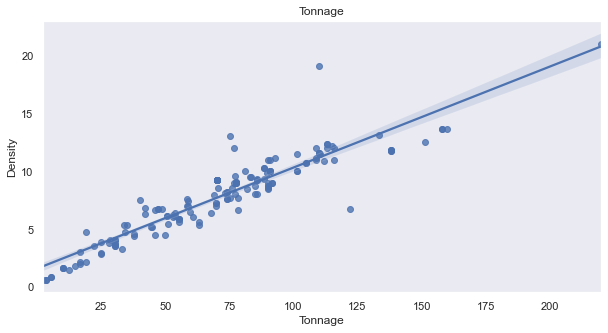

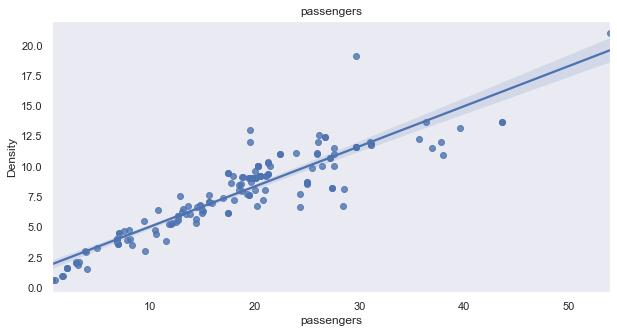

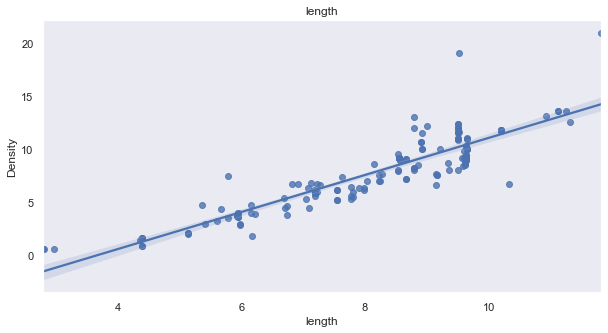

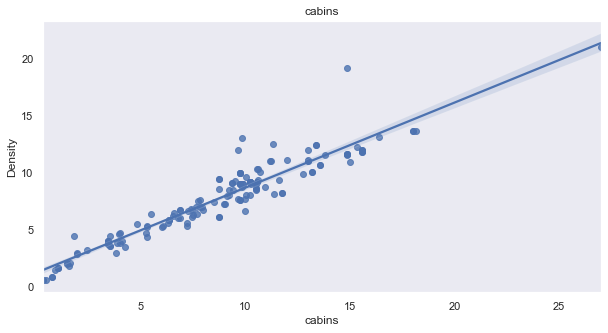

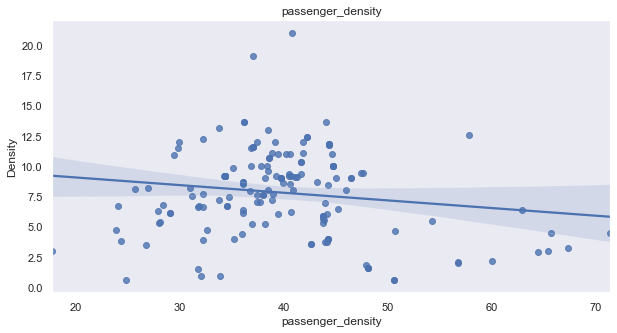

In [51]:
sns.set(rc={'figure.figsize':(10, 5)})

for i in df.columns[1:-1]:
    sns.regplot(x=i, y='crew', data=df)
    plt.xlabel(i)
    plt.ylabel("Density")
    plt.title(i)
    plt.show()

In [52]:
df.head()

,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [53]:
df.dtypes

Cruise_line           object
Age                    int64
Tonnage              float64
passengers           float64
length               float64
cabins               float64
passenger_density    float64
crew                 float64
dtype: object

In [54]:
df_safe = df.copy()

# One-hot encoding

In [55]:
df = pd.get_dummies(df, drop_first=True)

In [56]:
df

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df.dtypes

Age                                int64
Tonnage                          float64
passengers                       float64
length                           float64
cabins                           float64
passenger_density                float64
crew                             float64
Cruise_line_Carnival               uint8
Cruise_line_Celebrity              uint8
Cruise_line_Costa                  uint8
Cruise_line_Crystal                uint8
Cruise_line_Cunard                 uint8
Cruise_line_Disney                 uint8
Cruise_line_Holland_American       uint8
Cruise_line_MSC                    uint8
Cruise_line_Norwegian              uint8
Cruise_line_Oceania                uint8
Cruise_line_Orient                 uint8
Cruise_line_P&O                    uint8
Cruise_line_Princess               uint8
Cruise_line_Regent_Seven_Seas      uint8
Cruise_line_Royal_Caribbean        uint8
Cruise_line_Seabourn               uint8
Cruise_line_Silversea              uint8
Cruise_line_Star

#### As it is a Regression problem statement, so I will be using Linear Regression and also checking with Decision Tree Regressor and Random Forest Regressor in Standardization as independent features are following normal distribution.

# Approach-1: without scaling

In [58]:
df1 = df.copy()

In [59]:
df1

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
X1 = df1.drop(columns=["crew"])

In [61]:
X1

,Age,Tonnage,passengers,length,cabins,passenger_density,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
y1 = df1["crew"]

In [63]:
y1

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

In [65]:
X1.corrwith(y1).sort_values(ascending=False)

cabins                           0.950823
Tonnage                          0.927569
passengers                       0.915234
length                           0.895857
Cruise_line_Carnival             0.269685
Cruise_line_Royal_Caribbean      0.262656
Cruise_line_Princess             0.151938
Cruise_line_Cunard               0.097697
Cruise_line_Disney               0.053684
Cruise_line_P&O                  0.045179
Cruise_line_Norwegian            0.025165
Cruise_line_Celebrity            0.020678
Cruise_line_Costa               -0.007377
Cruise_line_MSC                 -0.016808
Cruise_line_Crystal             -0.061250
Cruise_line_Orient              -0.098131
Cruise_line_Star                -0.138289
Cruise_line_Holland_American    -0.140991
Cruise_line_Oceania             -0.151144
passenger_density               -0.155509
Cruise_line_Regent_Seven_Seas   -0.240603
Cruise_line_Silversea           -0.245582
Cruise_line_Seabourn            -0.246750
Cruise_line_Windstar            -0

In [66]:
from sklearn.model_selection import train_test_split

In [141]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, y1, test_size=0.25, random_state=100)

In [142]:
print(X1.shape)
print(xtrain1.shape)
print(xtest1.shape)
print()
print(y1.shape)
print(ytrain1.shape)
print(ytest1.shape)

(158, 25)
(118, 25)
(40, 25)

(158,)
(118,)
(40,)


In [143]:
from sklearn.linear_model import LinearRegression

m1 = LinearRegression()

In [144]:
m1.fit(xtrain1, ytrain1)

LinearRegression()

In [145]:
m1.coef_

array([ 1.09153779e-02,  1.77984937e-02, -1.12280341e-01,  3.90754347e-01,
        7.76097755e-01,  3.02075587e-03,  2.57503136e-02,  3.57985982e-01,
       -6.38127902e-01, -2.77555756e-16, -1.22191501e-01,  5.46493350e-01,
       -6.72430430e-01, -3.02740772e-01,  1.04381527e-01,  4.36532648e-01,
       -6.47029078e-01, -2.08261102e-01, -2.20083033e-01,  1.46778465e-01,
       -1.51292504e+00,  2.02074945e-01,  8.70754776e-02,  6.88282098e-01,
       -2.29547007e-01])

In [146]:
m1.intercept_

-1.4801845767285187

In [147]:
ypred1 = m1.predict(xtest1)
ypred1

array([ 6.17232287,  6.61161418, 13.4129876 , 12.61989095,  9.11663142,
        3.33883695,  5.28136883,  3.55      , 12.02018803,  9.43249479,
        9.81991435,  7.02761578,  9.08909886,  9.83082973, 11.48343798,
        3.97816924,  9.21762373,  3.22996624,  5.47478398,  9.58509166,
        5.48039544,  0.5254263 ,  9.09786654,  2.78025045,  5.50961828,
        2.22420785,  4.83965054,  9.95131408,  9.08767944, 10.83498371,
        7.58362416,  6.59750832, 11.41252039, 14.40884711,  9.05120504,
        9.96513381,  6.26089166,  6.91841279,  7.95010077,  3.0375619 ])

In [148]:
ytest1

45      6.36
11      6.60
124    13.60
15     11.60
7       9.20
113     3.73
92      5.20
1       3.55
102    12.00
51      9.45
31      9.99
73      7.60
26      9.09
29      9.99
97     11.00
88      4.00
41      9.20
40      3.85
59      5.88
154    12.00
54      5.57
32      0.60
85      9.59
147     2.87
46      5.45
157     1.80
121     6.71
20     10.29
28      9.09
77     11.09
125     7.60
139     7.20
104    11.10
126    13.60
12      9.20
16     10.30
62      5.61
128     7.20
135     8.68
118     4.47
Name: crew, dtype: float64

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(np.sqrt(mean_squared_error(ytest1, ypred1)))
print(mean_absolute_error(ytest1, ypred1))
print(r2_score(ytest1, ypred1) * 100)

0.646856659783428
0.3970088054938653
95.87809500798929


In [150]:
m1.score(xtest1, ytest1) * 100

95.87809500798929

# Approach-2 : Standardization

In [151]:
df2 = df.copy()

In [152]:
df2

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [153]:
X2 = df2.drop(columns=["crew"])

In [154]:
X2

,Age,Tonnage,passengers,length,cabins,passenger_density,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [155]:
y2 = df2["crew"]

In [156]:
y2

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

In [157]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X2 = scaler1.fit_transform(X2)

In [158]:
X2

array([[-1.27640208, -1.10498441, -1.19395611, ..., -0.16116459,
        -0.19867985, -0.13912167],
       [-1.27640208, -1.10498441, -1.19395611, ..., -0.16116459,
        -0.19867985, -0.13912167],
       [ 1.35810515, -0.64731003, -0.37292634, ..., -0.16116459,
        -0.19867985, -0.13912167],
       ...,
       [ 1.22637979, -1.77666231, -1.74960252, ..., -0.16116459,
        -0.19867985,  7.18795288],
       [ 1.48983051, -1.77666231, -1.74027264, ..., -0.16116459,
        -0.19867985,  7.18795288],
       [ 0.96292907, -1.52350654, -1.59410446, ..., -0.16116459,
        -0.19867985,  7.18795288]])

In [161]:
X2 = pd.DataFrame(X2, columns=X1.columns)
X2

,Age,Tonnage,passengers,length,cabins,passenger_density,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-0.402200,-0.259938,-0.273551,-0.113228,...,-0.139122,-0.079809,-0.19868,-0.347228,-0.180775,-0.412759,-0.139122,-0.161165,-0.198680,-0.139122
1,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-0.402200,-0.259938,-0.273551,-0.113228,...,-0.139122,-0.079809,-0.19868,-0.347228,-0.180775,-0.412759,-0.139122,-0.161165,-0.198680,-0.139122
2,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,2.486326,-0.259938,-0.273551,-0.113228,...,-0.139122,-0.079809,-0.19868,-0.347228,-0.180775,-0.412759,-0.139122,-0.161165,-0.198680,-0.139122
3,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,2.486326,-0.259938,-0.273551,-0.113228,...,-0.139122,-0.079809,-0.19868,-0.347228,-0.180775,-0.412759,-0.139122,-0.161165,-0.198680,-0.139122
4,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,2.486326,-0.259938,-0.273551,-0.113228,...,-0.139122,-0.079809,-0.19868,-0.347228,-0.180775,-0.412759,-0.139122,-0.161165,-0.198680,-0.139122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.831204,-1.830796,-1.844975,-2.987284,-1.907008,1.244688,-0.402200,-0.259938,-0.273551,-0.113228,...,-0.139122,-0.079809,-0.19868,-0.347228,-0.180775,-0.412759,-0.139122,-0.161165,5.033223,-0.139122
154,-0.222599,0.148615,0.118448,0.368817,0.188457,-0.083716,-0.402200,-0.259938,-0.273551,-0.113228,...,-0.139122,-0.079809,-0.19868,-0.347228,-0.180775,-0.412759,-0.139122,-0.161165,5.033223,-0.139122
155,1.226380,-1.776662,-1.749603,-2.086730,-1.815023,-0.701471,-0.402200,-0.259938,-0.273551,-0.113228,...,-0.139122,-0.079809,-0.19868,-0.347228,-0.180775,-0.412759,-0.139122,-0.161165,-0.198680,7.187953
156,1.489831,-1.776662,-1.740273,-2.086730,-1.815023,-0.912808,-0.402200,-0.259938,-0.273551,-0.113228,...,-0.139122,-0.079809,-0.19868,-0.347228,-0.180775,-0.412759,-0.139122,-0.161165,-0.198680,7.187953


In [162]:
from sklearn.model_selection import train_test_split

In [163]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y2, test_size=0.25, random_state=100)

In [164]:
print(X2.shape)
print(xtrain2.shape)
print(xtest2.shape)
print()
print(y2.shape)
print(ytrain2.shape)
print(ytest2.shape)

(158, 25)
(118, 25)
(40, 25)

(158,)
(118,)
(40,)


In [165]:
from sklearn.linear_model import LinearRegression

m2 = LinearRegression()

In [166]:
m2.fit(xtrain2, ytrain2)

LinearRegression()

In [167]:
m2.coef_

array([ 8.28646648e-02,  6.60529474e-01, -1.08310360e+00,  6.98586319e-01,
        3.45925761e+00,  2.60142494e-02,  8.91468968e-03,  8.71645297e-02,
       -1.62407342e-01,  3.21964677e-15, -1.66767105e-02,  6.10949187e-02,
       -1.91088933e-01, -6.63749872e-02,  2.86828456e-02,  5.95780274e-02,
       -5.13117159e-02, -3.98059959e-02, -6.81967209e-02,  2.56942516e-02,
       -5.33569658e-01,  2.75792124e-02,  1.36782058e-02,  1.31554833e-01,
       -3.13286027e-02])

In [168]:
m2.intercept_

7.7429118086046165

In [171]:
ypred2 = m2.predict(xtest2)
ypred2

array([ 6.17232287,  6.61161418, 13.4129876 , 12.61989095,  9.11663142,
        3.33883695,  5.28136883,  3.55      , 12.02018803,  9.43249479,
        9.81991435,  7.02761578,  9.08909886,  9.83082973, 11.48343798,
        3.97816924,  9.21762373,  3.22996624,  5.47478398,  9.58509166,
        5.48039544,  0.5254263 ,  9.09786654,  2.78025045,  5.50961828,
        2.22420785,  4.83965054,  9.95131408,  9.08767944, 10.83498371,
        7.58362416,  6.59750832, 11.41252039, 14.40884711,  9.05120504,
        9.96513381,  6.26089166,  6.91841279,  7.95010077,  3.0375619 ])

In [172]:
ytest2

45      6.36
11      6.60
124    13.60
15     11.60
7       9.20
113     3.73
92      5.20
1       3.55
102    12.00
51      9.45
31      9.99
73      7.60
26      9.09
29      9.99
97     11.00
88      4.00
41      9.20
40      3.85
59      5.88
154    12.00
54      5.57
32      0.60
85      9.59
147     2.87
46      5.45
157     1.80
121     6.71
20     10.29
28      9.09
77     11.09
125     7.60
139     7.20
104    11.10
126    13.60
12      9.20
16     10.30
62      5.61
128     7.20
135     8.68
118     4.47
Name: crew, dtype: float64

In [173]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(np.sqrt(mean_squared_error(ytest2, ypred2)))
print(mean_absolute_error(ytest2, ypred2))
print(r2_score(ytest2, ypred2) * 100)

0.6468566597834275
0.3970088054938647
95.8780950079893


In [205]:
m2.score(xtest2, ytest2) * 100

95.8780950079893

#### As all independent features are forming a bell curve, so using other algos after Standardization to check the performance

In [235]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=100)
dtr.fit(xtrain2,ytrain2)

DecisionTreeRegressor(random_state=100)

In [236]:
dtr.feature_importances_ * 100

array([4.82685227e+00, 2.39267104e+01, 4.54040137e-01, 2.74352975e+00,
       6.27737108e+01, 7.70275523e-01, 2.73923040e+00, 2.66662141e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.17348736e-01, 7.26154672e-03, 7.96625811e-01, 0.00000000e+00,
       0.00000000e+00, 4.25579087e-02, 2.38236150e-01, 0.00000000e+00,
       3.36516051e-01, 0.00000000e+00, 0.00000000e+00, 4.38300693e-04,
       0.00000000e+00])

In [237]:
(dtr.feature_importances_ * 100).sum()

100.0

In [238]:
dtr.score(xtest2,ytest2) * 100

94.29110347041564

In [239]:
from sklearn.ensemble import RandomForestRegressor
  
rfr = RandomForestRegressor(random_state=100)
rfr.fit(xtrain2,ytrain2)

RandomForestRegressor(random_state=100)

In [240]:
rfr.feature_importances_ * 100

array([1.43085430e+00, 2.10383828e+01, 1.32605756e+01, 7.17457930e+00,
       5.42467933e+01, 5.96394240e-01, 7.09621922e-01, 2.94861098e-02,
       1.00427068e-01, 0.00000000e+00, 2.18143424e-03, 4.52293201e-04,
       1.09798519e-01, 2.35429401e-02, 8.73096340e-01, 4.85072955e-03,
       1.36747137e-03, 1.31577590e-02, 2.60498291e-02, 2.33885681e-03,
       3.32183634e-01, 7.08960121e-04, 1.54475460e-03, 1.74871495e-02,
       4.12472603e-03])

In [241]:
rfr.score(xtest2,ytest2) * 100

94.99747828248755

# Approach-2 : Normalization

In [176]:
df3 = df.copy()

In [177]:
df3

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [179]:
X3 = df3.drop(columns=["crew"])

In [180]:
X3

,Age,Tonnage,passengers,length,cabins,passenger_density,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [181]:
y3 = df3["crew"]

In [182]:
y3

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

In [183]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
X3 = scaler2.fit_transform(X3)

In [184]:
X3

array([[0.04545455, 0.12839561, 0.11773528, ..., 0.        , 0.        ,
        0.        ],
       [0.04545455, 0.12839561, 0.11773528, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.20642621, 0.26621672, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47727273, 0.01387874, 0.01724784, ..., 0.        , 0.        ,
        1.        ],
       [0.52272727, 0.01387874, 0.01893513, ..., 0.        , 0.        ,
        1.        ],
       [0.43181818, 0.05704021, 0.04536933, ..., 0.        , 0.        ,
        1.        ]])

In [185]:
X3 = pd.DataFrame(X3, columns=X1.columns)
X3

,Age,Tonnage,passengers,length,cabins,passenger_density,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,0.045455,0.128396,0.117735,0.348837,0.120735,0.464173,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.045455,0.128396,0.117735,0.348837,0.120735,0.464173,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.500000,0.206426,0.266217,0.490587,0.266217,0.262423,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.159091,0.494650,0.545182,0.746401,0.545557,0.359017,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.295455,0.454925,0.482940,0.678848,0.482940,0.384515,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.409091,0.004649,0.000000,0.000000,0.000000,0.612693,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
154,0.227273,0.342126,0.355081,0.664452,0.350206,0.399777,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,0.477273,0.013879,0.017248,0.178295,0.015373,0.300763,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
156,0.522727,0.013879,0.018935,0.178295,0.015373,0.266890,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [186]:
from sklearn.model_selection import train_test_split

In [187]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(X3, y3, test_size=0.25, random_state=100)

In [189]:
print(X3.shape)
print(xtrain3.shape)
print(xtest3.shape)
print()
print(y3.shape)
print(ytrain3.shape)
print(ytest3.shape)

(158, 25)
(118, 25)
(40, 25)

(158,)
(118,)
(40,)


In [190]:
from sklearn.linear_model import LinearRegression

m3 = LinearRegression()

In [191]:
m3.fit(xtrain3, ytrain3)

LinearRegression()

In [192]:
m3.coef_

array([ 4.80276629e-01,  3.87421591e+00, -5.98903338e+00,  3.52851175e+00,
        2.06985271e+01,  1.62305213e-01,  2.57503136e-02,  3.57985982e-01,
       -6.38127902e-01,  8.88178420e-16, -1.22191501e-01,  5.46493350e-01,
       -6.72430430e-01, -3.02740772e-01,  1.04381527e-01,  4.36532648e-01,
       -6.47029078e-01, -2.08261102e-01, -2.20083033e-01,  1.46778465e-01,
       -1.51292504e+00,  2.02074945e-01,  8.70754776e-02,  6.88282098e-01,
       -2.29547007e-01])

In [193]:
m3.intercept_

-0.0693911326101464

In [194]:
ypred3 = m3.predict(xtest3)
ypred3

array([ 6.17232287,  6.61161418, 13.4129876 , 12.61989095,  9.11663142,
        3.33883695,  5.28136883,  3.55      , 12.02018803,  9.43249479,
        9.81991435,  7.02761578,  9.08909886,  9.83082973, 11.48343798,
        3.97816924,  9.21762373,  3.22996624,  5.47478398,  9.58509166,
        5.48039544,  0.5254263 ,  9.09786654,  2.78025045,  5.50961828,
        2.22420785,  4.83965054,  9.95131408,  9.08767944, 10.83498371,
        7.58362416,  6.59750832, 11.41252039, 14.40884711,  9.05120504,
        9.96513381,  6.26089166,  6.91841279,  7.95010077,  3.0375619 ])

In [195]:
ytest3

45      6.36
11      6.60
124    13.60
15     11.60
7       9.20
113     3.73
92      5.20
1       3.55
102    12.00
51      9.45
31      9.99
73      7.60
26      9.09
29      9.99
97     11.00
88      4.00
41      9.20
40      3.85
59      5.88
154    12.00
54      5.57
32      0.60
85      9.59
147     2.87
46      5.45
157     1.80
121     6.71
20     10.29
28      9.09
77     11.09
125     7.60
139     7.20
104    11.10
126    13.60
12      9.20
16     10.30
62      5.61
128     7.20
135     8.68
118     4.47
Name: crew, dtype: float64

In [196]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(np.sqrt(mean_squared_error(ytest3, ypred3)))
print(mean_absolute_error(ytest3, ypred3))
print(r2_score(ytest3, ypred3) * 100)

0.6468566597834283
0.39700880549386436
95.87809500798929


In [242]:
m3.score(xtest3, ytest3) * 100

95.87809500798929